In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts 
import os
import numpy as np
import pandas as pd
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
path = "HRR_Scorecard_ Population_1.csv"
df = pd.read_csv(path)
df.dtypes

HRR                                                                      object
Total Hospital Beds                                                       int64
Total ICU Beds                                                            int64
Available Hospital Beds                                                   int64
Potentially Available Hospital Beds*                                      int64
Available ICU Beds                                                        int64
Potentially Available ICU Beds*                                           int64
Adult Population                                                          int64
Population 65+                                                            int64
Projected Infected Individuals                                            int64
Projected Hospitalized Individuals                                        int64
Projected Individuals Needing ICU Care                                    int64
Hospital Beds Needed, Six Months        

In [3]:
df.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980,127,565,772,68,98,226444,50412,45289,...,1.42,1.09,70,1.03,0.71,0.55,45,0.66,0.46,0.35
1,"Akron, OH",1358,186,518,938,94,140,547990,111042,109598,...,2.36,1.78,165,1.76,1.18,0.89,108,1.15,0.77,0.58
2,"Alameda County, CA",2695,293,665,1680,139,216,1310189,214991,262038,...,3.52,2.59,380,2.73,1.76,1.30,248,1.78,1.15,0.85
3,"Albany, GA",704,60,221,462,27,43,157143,30466,31429,...,2.19,1.57,47,1.74,1.09,0.78,31,1.15,0.72,0.52
4,"Albany, NY",4804,425,1579,3191,193,309,1477723,318695,295545,...,2.92,2.12,452,2.34,1.46,1.06,294,1.52,0.95,0.69


In [4]:
df = df.dropna()
df.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980,127,565,772,68,98,226444,50412,45289,...,1.42,1.09,70,1.03,0.71,0.55,45,0.66,0.46,0.35
1,"Akron, OH",1358,186,518,938,94,140,547990,111042,109598,...,2.36,1.78,165,1.76,1.18,0.89,108,1.15,0.77,0.58
2,"Alameda County, CA",2695,293,665,1680,139,216,1310189,214991,262038,...,3.52,2.59,380,2.73,1.76,1.30,248,1.78,1.15,0.85
3,"Albany, GA",704,60,221,462,27,43,157143,30466,31429,...,2.19,1.57,47,1.74,1.09,0.78,31,1.15,0.72,0.52
4,"Albany, NY",4804,425,1579,3191,193,309,1477723,318695,295545,...,2.92,2.12,452,2.34,1.46,1.06,294,1.52,0.95,0.69


In [5]:
df["Aging pop"] = (df["Population 65+"]/df["Adult Population"])*100
df.head()

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop
0,"Abilene, TX",980,127,565,772,68,98,226444,50412,45289,...,1.09,70,1.03,0.71,0.55,45,0.66,0.46,0.35,22.262458
1,"Akron, OH",1358,186,518,938,94,140,547990,111042,109598,...,1.78,165,1.76,1.18,0.89,108,1.15,0.77,0.58,20.263508
2,"Alameda County, CA",2695,293,665,1680,139,216,1310189,214991,262038,...,2.59,380,2.73,1.76,1.30,248,1.78,1.15,0.85,16.409159
3,"Albany, GA",704,60,221,462,27,43,157143,30466,31429,...,1.57,47,1.74,1.09,0.78,31,1.15,0.72,0.52,19.387437
4,"Albany, NY",4804,425,1579,3191,193,309,1477723,318695,295545,...,2.12,452,2.34,1.46,1.06,294,1.52,0.95,0.69,21.566626


<b> Question: If a city has a higher percentage of aging population, is the infection rate going to be higher? <b>

The r-squared is: 0.08


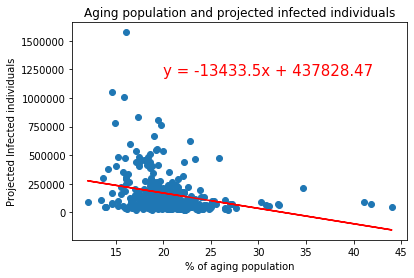

In [6]:
#Plotting
plt.scatter(df["Aging pop"], df["Projected Infected Individuals"])
plt.title("Aging population and projected infected individuals")
plt.xlabel("% of aging population")
plt.ylabel("Projected Infected individuals")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(df["Aging pop"], df["Projected Infected Individuals"])
regress_values = df["Aging pop"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df["Aging pop"],regress_values,"r-")
plt.annotate(line_eq,(20,1200000),fontsize=15,color="red")
print(f"The r-squared is: {round(rvalue**2, 3)}")

plt.savefig("Age predisposition to infection.png", dpi=300)
plt.show()

<b> There seems to be no correlation between aging population and infection rates (r-square value = 0.08) <b>


In [7]:
df[['City','State']] = df.HRR.apply( 
   lambda x: pd.Series(str(x).split(","))) 

In [8]:
State = df.groupby('State').mean()
State.head()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,...,"Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop
State,,,,,,,,,,,,,,,,,,,,,
AK,1583.000000,130.000000,533.000000,1058.000000,55.000000,93.000000,5.519120e+05,74327.000000,110382.000000,22385.000000,...,2.380000,155.000,2.820000,1.670000,1.190000,101.000000,1.840000,1.090000,0.780000,13.467183
AL,2465.500000,317.166667,880.333333,1672.833333,105.500000,211.333333,6.326592e+05,128590.166667,126531.833333,26484.333333,...,1.315000,191.000,2.046667,0.985000,0.656667,124.333333,1.331667,0.641667,0.426667,20.042828
AR,1712.000000,181.600000,812.600000,1262.200000,78.000000,129.800000,4.632598e+05,96220.000000,92651.800000,19432.000000,...,1.632000,140.600,1.770000,1.090000,0.818000,91.600000,1.158000,0.712000,0.530000,20.793517
AZ,3147.500000,425.500000,1190.750000,2169.000000,191.500000,308.750000,1.276333e+06,270505.000000,255266.750000,53640.500000,...,1.835000,388.750,2.022500,1.252500,0.920000,253.500000,1.320000,0.815000,0.600000,26.485299
CA,2836.416667,337.708333,941.041667,1888.666667,139.583333,238.708333,1.237807e+06,213178.750000,247561.416667,51087.000000,...,2.520833,362.125,3.102500,1.774167,1.261250,236.208333,2.025417,1.157500,0.822917,18.960040


<b> Question: Which states have the highest and the lowest bed counts ratio? <b>

In [9]:
State["Bed_ratio (per thousand)"] = (State["Total Hospital Beds"]/(State["Population 65+"]+ State["Adult Population"]))*1000
State.sort_values(by="Bed_ratio (per thousand)", ascending=False).head()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,...,"ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop,Bed_ratio (per thousand)
State,,,,,,,,,,,,,,,,,,,,,
SD,2471.500000,74.500000,998.000000,1734.500000,36.000000,55.0,388576.500000,83474.500000,77715.500000,16352.000000,...,118.500000,3.095000,2.000000,1.470000,77.500000,2.030000,1.310000,0.965000,21.502067,5.235663
MS,1694.333333,126.833333,727.000000,1210.500000,52.333333,89.5,294439.000000,57081.000000,58887.833333,12273.166667,...,88.166667,1.898333,1.131667,0.818333,57.500000,1.245000,0.743333,0.536667,19.455093,4.820020
ND,1177.500000,77.500000,478.500000,828.000000,29.500000,53.5,214294.750000,43545.500000,42859.000000,8970.250000,...,64.750000,2.467500,1.510000,1.107500,42.000000,1.587500,0.967500,0.712500,19.786560,4.566781
MT,1457.000000,92.333333,584.333333,1020.666667,43.666667,68.0,302177.666667,65857.666667,60435.333333,12734.000000,...,92.333333,2.010000,1.306667,0.970000,60.333333,1.313333,0.853333,0.636667,22.114201,3.958859
KS,2947.000000,277.000000,1409.500000,2178.000000,125.500000,201.0,652204.000000,133624.000000,130441.000000,27322.500000,...,197.500000,1.795000,1.115000,0.800000,128.500000,1.170000,0.720000,0.525000,20.159616,3.750185


In [10]:
#Top 10 States
top_10 = State.nlargest(10,'Bed_ratio (per thousand)')
top_10

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,...,"ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop,Bed_ratio (per thousand)
State,,,,,,,,,,,,,,,,,,,,,
SD,2471.500000,74.500000,998.000000,1734.500000,36.000000,55.000000,388576.500000,83474.500000,77715.500000,16352.000000,...,118.500000,3.095000,2.000000,1.470000,77.500000,2.030000,1.310000,0.965000,21.502067,5.235663
MS,1694.333333,126.833333,727.000000,1210.500000,52.333333,89.500000,294439.000000,57081.000000,58887.833333,12273.166667,...,88.166667,1.898333,1.131667,0.818333,57.500000,1.245000,0.743333,0.536667,19.455093,4.820020
ND,1177.500000,77.500000,478.500000,828.000000,29.500000,53.500000,214294.750000,43545.500000,42859.000000,8970.250000,...,64.750000,2.467500,1.510000,1.107500,42.000000,1.587500,0.967500,0.712500,19.786560,4.566781
MT,1457.000000,92.333333,584.333333,1020.666667,43.666667,68.000000,302177.666667,65857.666667,60435.333333,12734.000000,...,92.333333,2.010000,1.306667,0.970000,60.333333,1.313333,0.853333,0.636667,22.114201,3.958859
KS,2947.000000,277.000000,1409.500000,2178.000000,125.500000,201.000000,652204.000000,133624.000000,130441.000000,27322.500000,...,197.500000,1.795000,1.115000,0.800000,128.500000,1.170000,0.720000,0.525000,20.159616,3.750185
WV,1912.000000,200.333333,682.666667,1297.333333,67.000000,133.333333,418612.333333,95951.000000,83722.666667,17730.000000,...,129.666667,1.976667,0.953333,0.630000,84.666667,1.293333,0.623333,0.413333,22.585654,3.715772
NE,3032.000000,282.500000,1379.000000,2205.500000,108.500000,196.000000,735000.000000,144521.500000,147000.000000,30676.000000,...,220.500000,2.925000,1.400000,0.935000,143.500000,1.900000,0.910000,0.610000,19.883847,3.447329
WY,633.000000,32.000000,378.000000,505.000000,20.000000,26.000000,152884.000000,31930.000000,30577.000000,6416.000000,...,46.000000,2.300000,1.770000,1.440000,30.000000,1.500000,1.150000,0.940000,20.885116,3.425065
LA,1448.400000,157.200000,633.800000,1041.100000,64.000000,110.500000,366874.500000,68457.100000,73374.800000,15241.800000,...,109.000000,1.856000,1.103000,0.793000,71.000000,1.210000,0.719000,0.516000,19.138664,3.327119


In [11]:
#Bar Graph
x_axis_1 = ["SD", "MS", "ND", "MT", "KS", "WV", "NE", "WY", "LA", "AL"]
y_axis_1 = top_10["Bed_ratio (per thousand)"]


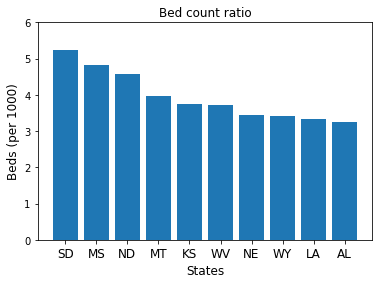

In [12]:
plt.bar(x_axis_1, y_axis_1, color="C0", align="center")

# Formatting
plt.title("Bed count ratio", fontsize=12)
plt.xlabel("States", fontsize=12)
plt.ylabel("Beds (per 1000)", fontsize=12)
plt.ylim(0, 6)
plt.xticks(fontsize=12)

plt.savefig("Top ten states in preparedness.png", dpi=300)
plt.show()

In [13]:
#Bottom 10 States
bottom_10 = State.nsmallest(10,'Bed_ratio (per thousand)')
bottom_10.head()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,...,"ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop,Bed_ratio (per thousand)
State,,,,,,,,,,,,,,,,,,,,,
OR,1529.800000,194.6,571.600000,1050.800000,78.8,136.600000,723070.4,149550.600000,144614.000000,30318.200000,...,219.000000,4.210,1.974,1.340000,142.800000,2.740000,1.284000,0.874000,22.815034,1.753109
NM,2908.000000,380.0,1102.000000,2005.000000,161.0,270.000000,1336795.0,279457.000000,267359.000000,56108.000000,...,406.000000,2.520,1.500,1.070000,265.000000,1.650000,0.980000,0.700000,20.905000,1.799224
WA,1936.333333,238.0,680.166667,1308.333333,81.5,159.666667,892926.5,166454.833333,178585.166667,37093.833333,...,264.666667,3.545,1.800,1.218333,172.833333,2.318333,1.181667,0.796667,19.190532,1.827796
RI,2249.000000,293.0,690.000000,1470.000000,82.0,188.000000,986702.0,192737.000000,197340.000000,41157.000000,...,295.000000,3.600,1.570,1.010000,193.000000,2.350000,1.030000,0.660000,19.533456,1.906839
HI,2623.000000,219.0,795.000000,1709.000000,73.0,146.000000,1114023.0,238126.000000,222805.000000,46857.000000,...,340.000000,4.660,2.330,1.550000,222.000000,3.040000,1.520000,1.010000,21.375322,1.939875


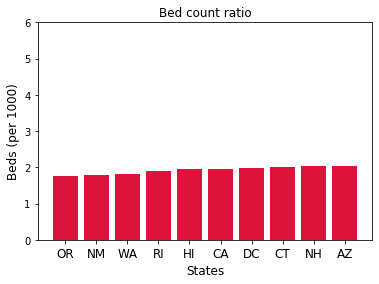

In [14]:
#Bar Graph
x_axis_2 = ["OR", "NM", "WA", "RI", "HI", "CA", "DC", "CT", "NH", "AZ"]
y_axis_2 = bottom_10["Bed_ratio (per thousand)"]
plt.bar(x_axis_2, y_axis_2, color="crimson", align="center")
plt.ylim(0, 6)

plt.title("Bed count ratio", fontsize=12)
plt.xlabel("States", fontsize=12)
plt.ylabel("Beds (per 1000)", fontsize=12)
plt.ylim(0, 6)
plt.xticks(fontsize=12)

plt.savefig("Bottom ten states in preparedness.png", dpi=300)
plt.show()

<b> Question: How does Chicago fare against the rest of the country?


In [15]:
total_us = df[["HRR", "Projected Infected Individuals", "Projected Hospitalized Individuals", "Projected Individuals Needing ICU Care"]]
total_us = pd.DataFrame(round(total_us.mean()))
total_us = total_us.T

illinois = df.loc[df["HRR"] == "Chicago, IL", :]
illinois = illinois[["HRR", "Projected Infected Individuals", "Projected Hospitalized Individuals", "Projected Individuals Needing ICU Care"]]

new_york = df.loc[df["HRR"] == "Manhattan, NY", :]
new_york = new_york[["HRR", "Projected Infected Individuals", "Projected Hospitalized Individuals", "Projected Individuals Needing ICU Care"]]

In [16]:
frames = [illinois, new_york, total_us]
illinois_new_york_vs_us = pd.concat(frames)
illinois_new_york_vs_us = illinois_new_york_vs_us.fillna('US')
illinois_new_york_vs_us 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,HRR,Projected Hospitalized Individuals,Projected Individuals Needing ICU Care,Projected Infected Individuals
50,"Chicago, IL",83532.0,17529.0,409014.0
157,"Manhattan, NY",172372.0,36678.0,834687.0
0,US,33768.0,7263.0,162092.0


In [17]:
illinois_new_york_vs_us = illinois_new_york_vs_us.sort_values(by="Projected Hospitalized Individuals", ascending=True)

<Figure size 432x288 with 0 Axes>

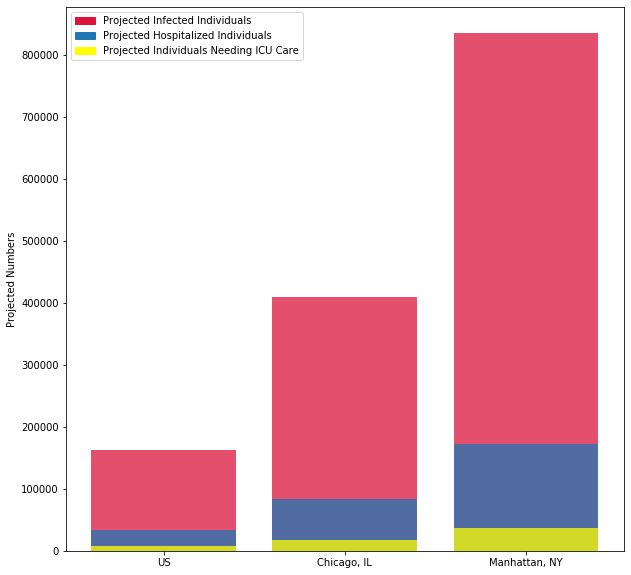

In [74]:
#Bar Graph
plt.tight_layout()
plt.figure(figsize=(10,10))

x_axis_3 = illinois_new_york_vs_us["HRR"]
y_axis_3 = illinois_new_york_vs_us["Projected Infected Individuals"]
plt.ylabel("Projected Numbers")
plt.bar(x_axis_3, y_axis_3, color="crimson", alpha=0.75, align="center")

y_axis_4 = illinois_new_york_vs_us["Projected Hospitalized Individuals"]
plt.bar(x_axis_3, y_axis_4, color="C0", alpha=0.75, align="center")

y_axis_5 = illinois_new_york_vs_us["Projected Individuals Needing ICU Care"]
plt.bar(x_axis_3, y_axis_5, color="yellow", alpha=0.75, align="center")

colors = {'Projected Infected Individuals':'crimson', 'Projected Hospitalized Individuals':'C0', 'Projected Individuals Needing ICU Care': "yellow" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.savefig("6 month projection of infection, hospitalization and ICU care_Chicago, Manhattan vs US.png", dpi=300)
plt.show()



<b> Answer: Chicago's projection are higher than the average US projections

<b> What percentage of infected people would need hospitalization?
   

In [19]:
df["hospitalization rate"] = round((df["Projected Hospitalized Individuals"]/df["Projected Infected Individuals"])*100, 2)

mean_hospitalization_rate = round(df["hospitalization rate"].mean(), 2)
mean_hospitalization_rate

20.95

In [20]:
groupby_state = df.groupby('State')
groupby_state = round(groupby_state.mean(), 2)
groupby_state.head()

,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,...,"ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop,hospitalization rate
State,,,,,,,,,,,,,,,,,,,,,
AK,1583.00,130.00,533.00,1058.00,55.00,93.00,551912.00,74327.00,110382.00,22385.00,...,155.00,2.82,1.67,1.19,101.00,1.84,1.09,0.78,13.47,20.28
AL,2465.50,317.17,880.33,1672.83,105.50,211.33,632659.17,128590.17,126531.83,26484.33,...,191.00,2.05,0.99,0.66,124.33,1.33,0.64,0.43,20.04,20.90
AR,1712.00,181.60,812.60,1262.20,78.00,129.80,463259.80,96220.00,92651.80,19432.00,...,140.60,1.77,1.09,0.82,91.60,1.16,0.71,0.53,20.79,20.98
AZ,3147.50,425.50,1190.75,2169.00,191.50,308.75,1276332.75,270505.00,255266.75,53640.50,...,388.75,2.02,1.25,0.92,253.50,1.32,0.82,0.60,26.49,21.51
CA,2836.42,337.71,941.04,1888.67,139.58,238.71,1237806.75,213178.75,247561.42,51087.00,...,362.12,3.10,1.77,1.26,236.21,2.03,1.16,0.82,18.96,20.80


In [21]:
groupby_state_df = groupby_state.reset_index()
groupby_state_df

,State,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months",Aging pop,hospitalization rate
0,AK,1583.00,130.00,533.00,1058.00,55.00,93.00,551912.00,74327.00,110382.00,...,155.00,2.82,1.67,1.19,101.00,1.84,1.09,0.78,13.47,20.28
1,AL,2465.50,317.17,880.33,1672.83,105.50,211.33,632659.17,128590.17,126531.83,...,191.00,2.05,0.99,0.66,124.33,1.33,0.64,0.43,20.04,20.90
2,AR,1712.00,181.60,812.60,1262.20,78.00,129.80,463259.80,96220.00,92651.80,...,140.60,1.77,1.09,0.82,91.60,1.16,0.71,0.53,20.79,20.98
3,AZ,3147.50,425.50,1190.75,2169.00,191.50,308.75,1276332.75,270505.00,255266.75,...,388.75,2.02,1.25,0.92,253.50,1.32,0.82,0.60,26.49,21.51
4,CA,2836.42,337.71,941.04,1888.67,139.58,238.71,1237806.75,213178.75,247561.42,...,362.12,3.10,1.77,1.26,236.21,2.03,1.16,0.82,18.96,20.80
5,CO,1476.43,185.00,631.00,1053.71,73.14,129.14,616074.43,104889.00,123214.86,...,179.86,3.55,1.96,1.35,117.14,2.31,1.27,0.88,18.47,20.75
6,CT,2344.67,247.00,577.00,1460.67,99.33,173.33,970847.33,197252.67,194169.33,...,293.00,2.88,1.68,1.19,191.33,1.88,1.10,0.78,20.07,20.91
7,DC,5055.00,601.00,1595.00,3325.00,218.00,409.00,2179021.00,378878.00,435804.00,...,638.00,2.93,1.56,1.06,416.00,1.91,1.02,0.69,17.39,20.65
8,DE,1845.00,237.00,601.00,1223.00,62.00,149.00,637120.00,120121.00,127424.00,...,189.00,3.05,1.27,0.80,124.00,2.00,0.83,0.52,18.85,20.79
9,FL,3161.41,378.41,1086.12,2123.82,124.29,251.12,971567.35,234945.12,194313.53,...,304.41,2.54,1.26,0.85,198.71,1.66,0.82,0.55,26.84,21.55


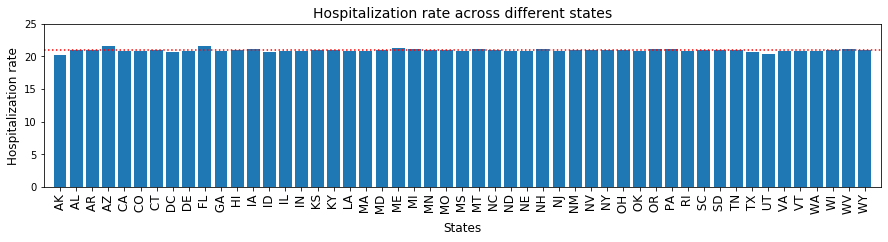

In [73]:
plt.figure(figsize=(15,3))
plt.tight_layout()
x_axis_5 = np.arange(len(groupby_state_df["State"]))
tick_locations = [value for value in x_axis_5]
plt.xticks(tick_locations, groupby_state_df["State"], rotation=90)

y_axis_5 = groupby_state_df["hospitalization rate"]
plt.bar(x_axis_5, y_axis_5, color="C0", align="center")
plt.xticks(rotation=90, fontsize=12)

plt.xlim([-1, x_axis_5.size])
plt.hlines(20.95, -1, 51, color="r", linestyles="dotted")

# Formatting
plt.title("Hospitalization rate across different states", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Hospitalization rate", fontsize=12)
plt.ylim(0, 25)


plt.savefig("Hospitalization rates.png", dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

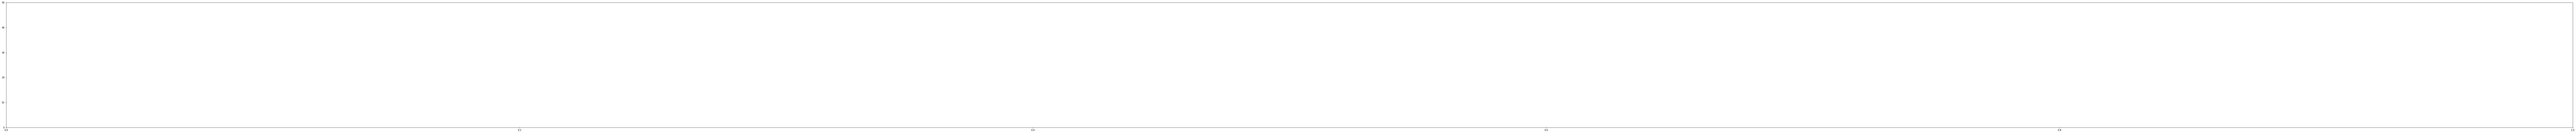

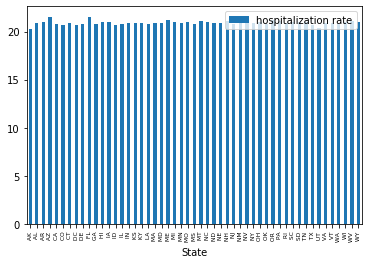

In [22]:
plt.tight_layout()
plt.figure(figsize=(200,10))
plt.ylim(0, 50)

groupby_state.plot(kind="bar", y= ["hospitalization rate"])
plt.xticks(rotation=90, fontsize=6)


plt.savefig("Hospitalization rate.png", dpi=300)
plt.show()


In [23]:
x_axis = np.arange(len(new_data_df["Province_State"]))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(new_data_df["Province_State"], new_data_df["Confirmed"], color="green")
plt.xticks(tick_locations, new_data_df["Province_State"], rotation=90)
plt.title("Confirmed cases of the states on 04/14/2020")
plt.xlabel("States and Provinces")
plt.ylabel("Number of cases")
plt.show()

NameError: name 'new_data_df' is not defined